# Import basic Library to read file

In [158]:
import pandas as pd
import numpy as np

In [159]:
df = pd.read_csv("train_ctrUa4K.csv")

In [160]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [161]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Function to Imput NAN values

In [162]:
def impute_mode(col):
    df[col].fillna(df[col].mode()[0], inplace = True)

In [163]:
def impute_median(col):
    df[col].fillna(df[col].median(), inplace = True)

In [164]:
impute_mode('Gender')

In [165]:
impute_mode('Married')

In [166]:
impute_mode('Dependents')

In [167]:
impute_mode('Self_Employed')

In [168]:
impute_median('LoanAmount')

In [169]:
impute_mode('Loan_Amount_Term')

In [170]:
impute_mode('Credit_History')

In [171]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Encoding the Cat features

In [172]:
gender = pd.get_dummies(df['Gender'], drop_first=False, prefix='Gen')

married = pd.get_dummies(df['Married'], drop_first=False, prefix='Mar')

edu = pd.get_dummies(df['Education'], drop_first=False, prefix = 'Edu')

emp = pd.get_dummies(df['Self_Employed'], drop_first=False, prefix = 'Emp')

cre = pd.get_dummies(df['Credit_History'], drop_first=False, prefix = 'Cre')

loan = pd.get_dummies(df['Loan_Amount_Term'], drop_first=False, prefix = 'Loan')

area = pd.get_dummies(df['Property_Area'], drop_first=False, prefix = 'Area')

In [173]:
final_df = df.drop(['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term', 'Property_Area'], axis = 1)

In [174]:
final_df = pd.concat([final_df,gender, married, edu, emp, cre, loan, area], axis = 1)

In [175]:
final_df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gen_Female,Gen_Male,Mar_No,Mar_Yes,...,Loan_84.0,Loan_120.0,Loan_180.0,Loan_240.0,Loan_300.0,Loan_360.0,Loan_480.0,Area_Rural,Area_Semiurban,Area_Urban
0,LP001002,0,5849,0.0,128.0,Y,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,N,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
3,LP001006,0,2583,2358.0,120.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,LP001008,0,6000,0.0,141.0,Y,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,Y,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
610,LP002979,3+,4106,0.0,40.0,Y,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
611,LP002983,1,8072,240.0,253.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
612,LP002984,2,7583,0.0,187.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1


In [176]:
final_df['Dependents'].replace('3+','3', inplace=True)

In [177]:
final_df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [178]:
final_df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gen_Female,Gen_Male,Mar_No,Mar_Yes,...,Loan_84.0,Loan_120.0,Loan_180.0,Loan_240.0,Loan_300.0,Loan_360.0,Loan_480.0,Area_Rural,Area_Semiurban,Area_Urban
0,LP001002,0,5849,0.0,128.0,Y,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,N,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
3,LP001006,0,2583,2358.0,120.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,LP001008,0,6000,0.0,141.0,Y,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,Y,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
610,LP002979,3,4106,0.0,40.0,Y,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
611,LP002983,1,8072,240.0,253.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
612,LP002984,2,7583,0.0,187.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1


In [179]:
X = final_df.drop(["Loan_Status","Loan_ID"], axis = 1)

In [180]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Gen_Female,Gen_Male,Mar_No,Mar_Yes,Edu_Graduate,Edu_Not Graduate,...,Loan_84.0,Loan_120.0,Loan_180.0,Loan_240.0,Loan_300.0,Loan_360.0,Loan_480.0,Area_Rural,Area_Semiurban,Area_Urban
0,0,5849,0.0,128.0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1,4583,1508.0,128.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
2,0,3000,0.0,66.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
3,0,2583,2358.0,120.0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,6000,0.0,141.0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
610,3,4106,0.0,40.0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
611,1,8072,240.0,253.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
612,2,7583,0.0,187.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [181]:
y = final_df["Loan_Status"]

In [182]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

# Libraries used for modelling / splitting the dataset

In [183]:
from sklearn.model_selection import train_test_split, cross_val_score #Spliting method
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, BaggingClassifier, VotingClassifier#Ensemble models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score #Metrics
from category_encoders import LeaveOneOutEncoder #Encoding
from mlxtend.classifier import StackingCVClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [185]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [186]:
X_train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Gen_Female,Gen_Male,Mar_No,Mar_Yes,Edu_Graduate,Edu_Not Graduate,...,Loan_84.0,Loan_120.0,Loan_180.0,Loan_240.0,Loan_300.0,Loan_360.0,Loan_480.0,Area_Rural,Area_Semiurban,Area_Urban
517,0,3074,1800.0,123.0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
500,0,645,3683.0,113.0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
379,2,5391,0.0,130.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
566,0,3333,0.0,70.0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
301,0,2875,1750.0,105.0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,0,2400,0.0,75.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
111,0,2929,2333.0,139.0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
420,0,5829,0.0,138.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
242,0,2965,5701.0,155.0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [187]:
y_train

517    N
500    Y
379    Y
566    Y
301    Y
      ..
42     Y
111    Y
420    Y
242    Y
168    N
Name: Loan_Status, Length: 491, dtype: object

In [188]:
X_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Gen_Female,Gen_Male,Mar_No,Mar_Yes,Edu_Graduate,Edu_Not Graduate,...,Loan_84.0,Loan_120.0,Loan_180.0,Loan_240.0,Loan_300.0,Loan_360.0,Loan_480.0,Area_Rural,Area_Semiurban,Area_Urban
483,0,10833,0.0,234.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
581,0,1836,33837.0,90.0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
221,2,4009,1717.0,116.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
520,2,2192,1742.0,45.0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
552,1,3333,3250.0,158.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0,4680,2087.0,128.0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
443,1,37719,0.0,152.0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
120,0,5667,2667.0,180.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
113,1,7451,0.0,128.0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [189]:
y_test

483    Y
581    N
221    Y
520    Y
552    Y
      ..
524    N
443    Y
120    Y
113    Y
299    N
Name: Loan_Status, Length: 123, dtype: object

# Logistic Regression

In [190]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [191]:
train_pred = lg.predict(X_train)

test_pred = lg.predict(X_test)

In [192]:
confusion_matrix(y_train, train_pred)

array([[ 67,  83],
       [  6, 335]], dtype=int64)

In [193]:
accuracy_score(y_train, train_pred)

0.8187372708757638

In [194]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           N       0.92      0.45      0.60       150
           Y       0.80      0.98      0.88       341

    accuracy                           0.82       491
   macro avg       0.86      0.71      0.74       491
weighted avg       0.84      0.82      0.80       491



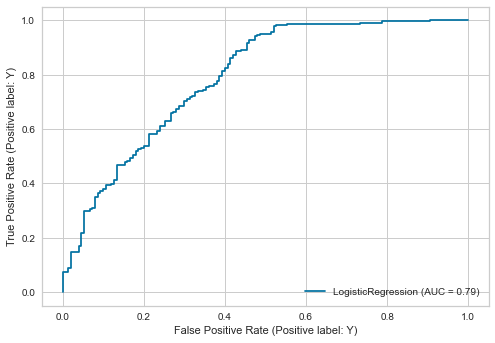

In [195]:
plot_roc_curve(lg,X_train, y_train)

In [196]:
accuracy_score(y_test,test_pred)

0.7804878048780488

# Scaling the data

In [197]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [198]:
ro = RobustScaler()

In [199]:
depen = pd.get_dummies(final_df['Dependents'], drop_first=False, prefix = 'Dep')

In [200]:
scaled = pd.DataFrame(ro.fit_transform(final_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]), index=final_df.index, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

In [201]:
final_df = pd.concat([final_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Dependents'],axis = 1),scaled, depen], axis = 1)

In [202]:
final_df

,Loan_ID,Loan_Status,Gen_Female,Gen_Male,Mar_No,Mar_Yes,Edu_Graduate,Edu_Not Graduate,Emp_No,Emp_Yes,...,Area_Rural,Area_Semiurban,Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Dep_0,Dep_1,Dep_2,Dep_3
0,LP001002,Y,0,1,1,0,1,0,1,0,...,0,0,1,0.698029,-0.517358,0.000000,1,0,0,0
1,LP001003,N,0,1,0,1,1,0,1,0,...,1,0,0,0.264096,0.139079,0.000000,0,1,0,0
2,LP001005,Y,0,1,0,1,1,0,0,1,...,0,0,1,-0.278492,-0.517358,-0.961240,1,0,0,0
3,LP001006,Y,0,1,0,1,0,1,1,0,...,0,0,1,-0.421422,0.509087,-0.124031,1,0,0,0
4,LP001008,Y,0,1,1,0,1,0,1,0,...,0,0,1,0.749786,-0.517358,0.201550,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Y,1,0,1,0,1,0,1,0,...,1,0,0,-0.312768,-0.517358,-0.883721,1,0,0,0
610,LP002979,Y,0,1,0,1,1,0,1,0,...,1,0,0,0.100600,-0.517358,-1.364341,0,0,0,1
611,LP002983,Y,0,1,0,1,1,0,1,0,...,0,0,1,1.459983,-0.412885,1.937984,0,1,0,0
612,LP002984,Y,0,1,0,1,1,0,1,0,...,0,0,1,1.292374,-0.517358,0.914729,0,0,1,0


In [203]:
X = final_df.drop(["Loan_ID", "Loan_Status"], axis= 1)

In [204]:
y = final_df["Loan_Status"]

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

# Log Regression after scaling 

In [206]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [207]:
train_pred = lg.predict(X_train)

test_pred = lg.predict(X_test)

In [208]:
accuracy_score(y_train, train_pred)

0.8024439918533605

In [209]:
accuracy_score(y_test, test_pred)

0.8455284552845529

In [210]:
def model_fit(alg, X_train, X_test, y_train, y_test, if_cv = True, cv_folds = 5):
    alg.fit(X_train, y_train)
    
    #Cross-val
    if if_cv:
        cv_score = cross_val_score(alg, X_train, y_train, cv = cv_folds, scoring = 'f1_macro')
    
    prediction = alg.predict(X_test)
    
    if if_cv:
        print('CV report: Mean - %.3g | Std - %.3g | Min - %.3g, Max- %.3g' %(np.mean(cv_score),
                                                                              np.std(cv_score), 
                                                                              np.min(cv_score), 
                                                                              np.max(cv_score)))
    print("Accuracy: ", accuracy_score(y_test, prediction))
    print('-'*100)
    
    cm = pd.DataFrame(confusion_matrix(y_test, prediction))
    print(cm)


# KNN Finding best k value

In [211]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_fit(knn, X_train, X_test, y_train, y_test)

CV report: Mean - 0.66 | Std - 0.0361 | Min - 0.605, Max- 0.705
Accuracy:  0.7642276422764228
----------------------------------------------------------------------------------------------------
    0   1
0  10  23
1   6  84


In [212]:
def KNN_predicts(train_x, test_x, train_y, test_y, scaler, neighbours, metric ="manhattan", weights = 'uniform'):
    train_scaled = scaler.fit_transform(train_x)
    test_scaled = scaler.transform(test_x)
    
    KNN = KNeighborsClassifier(n_neighbors = neighbours, metric = metric, weights = weights, n_jobs = -1)
    KNN.fit(train_scaled, train_y)
    prediction= KNN.predict(test_scaled)
    
    print("accuracy: ", accuracy_score(test_y, prediction))
    #print("accuracy: ", accuracy_score(train_x, prediction))
    print("-"*100)
    return KNN

In [213]:
KNN_predicts(X_train, X_test, y_train, y_test, StandardScaler(),1)

accuracy:  0.7317073170731707
----------------------------------------------------------------------------------------------------


KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=1)

In [214]:
for k in range(1, 11):
    print("Accuracy score on KNN using n_neighbors = {0}". format(k), end = ' ')
    KNN_predicts(X_train, X_test, y_train, y_test, StandardScaler(), k)

Accuracy score on KNN using n_neighbors = 1 accuracy:  0.7317073170731707
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 2 accuracy:  0.6504065040650406
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 3 accuracy:  0.7317073170731707
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 4 accuracy:  0.7154471544715447
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 5 accuracy:  0.7804878048780488
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 6 accuracy:  0.7723577235772358
---------------------------------------------------

In [215]:
k = 5 
for metric in ['euclidean', 'minkowski', 'manhattan', 'chebyshev']:
    print("Accuracy score on KNN using {} metric and {} neighbors :" .format(metric, k), end = ' ')
    KNN_predicts(X_train, X_test, y_train, y_test, StandardScaler(), k, metric)

Accuracy score on KNN using euclidean metric and 5 neighbors : accuracy:  0.8048780487804879
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using minkowski metric and 5 neighbors : accuracy:  0.8048780487804879
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using manhattan metric and 5 neighbors : accuracy:  0.7804878048780488
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using chebyshev metric and 5 neighbors : accuracy:  0.7967479674796748
----------------------------------------------------------------------------------------------------


In [216]:
for weight in ['uniform', 'distance']:
    print("Accuracy score on KNN using neighbors = {0}:" .format(weight), end = ' ')
    KNN_predicts(X_train, X_test, y_train, y_test, StandardScaler(), 5, metric = 'manhattan', weights = weight)

Accuracy score on KNN using neighbors = uniform: accuracy:  0.7804878048780488
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using neighbors = distance: accuracy:  0.7886178861788617
----------------------------------------------------------------------------------------------------


In [217]:
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', weights = 'uniform', n_jobs = -1)

In [218]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1)

In [219]:
KNN.score(X_train,y_train)

0.8126272912423625

# n_neighbors = 5, metric = 'euclidean', weights = 'uniform', n_jobs = -1

In [220]:
KNN.score(X_test,y_test)

0.7642276422764228

# Decision tree approach resulted in overfitting issue 

In [221]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [222]:
dc.score(X_train,y_train)

1.0

In [223]:
dc.score(X_test,y_test)

0.6504065040650406

# ensemble methods tried RF, ADAboost, Gradientboost, BaggingClassifier, CATBoost, XGBoost, LGBMClassifier

In [224]:
rc = RandomForestClassifier()
rc.fit(X_train,y_train)

RandomForestClassifier()

In [225]:
rc.score(X_train,y_train)

1.0

In [226]:
rc.score(X_test,y_test)

0.8292682926829268

In [227]:
ad = AdaBoostClassifier()
ad.fit(X_train,y_train)

AdaBoostClassifier()

In [228]:
ad.score(X_train,y_train)

0.8492871690427699

In [229]:
ad.score(X_test,y_test)

0.7642276422764228

In [230]:
GB = GradientBoostingClassifier()
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [231]:
GB.score(X_train,y_train)

0.8920570264765784

In [232]:
GB.score(X_test,y_test)

0.7886178861788617

In [233]:
bg = BaggingClassifier()
bg.fit(X_train,y_train)

BaggingClassifier()

In [234]:
bg.score(X_train,y_train)

0.9735234215885947

In [235]:
bg.score(X_test,y_test)

0.7804878048780488

In [236]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [237]:
xgb.score(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


1.0

In [238]:
xgb.score(X_test,y_test)

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.7723577235772358

In [239]:
lg = LGBMClassifier()
lg.fit(X_train,y_train)

LGBMClassifier()

In [240]:
lg.score(X_test,y_test)

0.7804878048780488

In [241]:
lg.score(X_train,y_train)

0.9898167006109979

In [242]:
cat = CatBoostClassifier()
cat.fit(X_train,y_train)

Learning rate set to 0.007604
0:	learn: 0.6897347	total: 1.85ms	remaining: 1.85s
1:	learn: 0.6861306	total: 5.95ms	remaining: 2.97s
2:	learn: 0.6828292	total: 7.85ms	remaining: 2.61s
3:	learn: 0.6791608	total: 11.6ms	remaining: 2.89s
4:	learn: 0.6752946	total: 15.4ms	remaining: 3.07s
5:	learn: 0.6720028	total: 18.2ms	remaining: 3.02s
6:	learn: 0.6683097	total: 22ms	remaining: 3.13s
7:	learn: 0.6648265	total: 25.9ms	remaining: 3.21s
8:	learn: 0.6617757	total: 27.7ms	remaining: 3.05s
9:	learn: 0.6584839	total: 31.3ms	remaining: 3.09s
10:	learn: 0.6549527	total: 35.4ms	remaining: 3.18s
11:	learn: 0.6514786	total: 38.9ms	remaining: 3.2s
12:	learn: 0.6479224	total: 42.5ms	remaining: 3.22s
13:	learn: 0.6451998	total: 44ms	remaining: 3.1s
14:	learn: 0.6417939	total: 47.4ms	remaining: 3.11s
15:	learn: 0.6387806	total: 51.1ms	remaining: 3.14s
16:	learn: 0.6353729	total: 54.7ms	remaining: 3.16s
17:	learn: 0.6324253	total: 58.3ms	remaining: 3.18s
18:	learn: 0.6291750	total: 62.3ms	remaining: 3.22

173:	learn: 0.4379037	total: 590ms	remaining: 2.8s
174:	learn: 0.4377595	total: 592ms	remaining: 2.79s
175:	learn: 0.4374448	total: 596ms	remaining: 2.79s
176:	learn: 0.4372216	total: 598ms	remaining: 2.78s
177:	learn: 0.4366715	total: 601ms	remaining: 2.77s
178:	learn: 0.4361976	total: 603ms	remaining: 2.77s
179:	learn: 0.4360413	total: 605ms	remaining: 2.76s
180:	learn: 0.4355267	total: 609ms	remaining: 2.75s
181:	learn: 0.4348888	total: 612ms	remaining: 2.75s
182:	learn: 0.4344030	total: 615ms	remaining: 2.75s
183:	learn: 0.4338533	total: 618ms	remaining: 2.74s
184:	learn: 0.4332671	total: 622ms	remaining: 2.74s
185:	learn: 0.4327928	total: 625ms	remaining: 2.73s
186:	learn: 0.4322043	total: 629ms	remaining: 2.73s
187:	learn: 0.4316339	total: 632ms	remaining: 2.73s
188:	learn: 0.4312785	total: 637ms	remaining: 2.73s
189:	learn: 0.4308705	total: 641ms	remaining: 2.73s
190:	learn: 0.4304764	total: 644ms	remaining: 2.73s
191:	learn: 0.4298335	total: 649ms	remaining: 2.73s
192:	learn: 0

374:	learn: 0.3667469	total: 1.21s	remaining: 2.02s
375:	learn: 0.3665495	total: 1.21s	remaining: 2.02s
376:	learn: 0.3662380	total: 1.22s	remaining: 2.01s
377:	learn: 0.3660274	total: 1.22s	remaining: 2.01s
378:	learn: 0.3657732	total: 1.22s	remaining: 2s
379:	learn: 0.3654566	total: 1.23s	remaining: 2s
380:	learn: 0.3651472	total: 1.23s	remaining: 2s
381:	learn: 0.3648350	total: 1.23s	remaining: 1.99s
382:	learn: 0.3645467	total: 1.24s	remaining: 1.99s
383:	learn: 0.3641509	total: 1.24s	remaining: 1.99s
384:	learn: 0.3638157	total: 1.24s	remaining: 1.98s
385:	learn: 0.3635869	total: 1.25s	remaining: 1.98s
386:	learn: 0.3631683	total: 1.25s	remaining: 1.98s
387:	learn: 0.3630089	total: 1.25s	remaining: 1.97s
388:	learn: 0.3626501	total: 1.25s	remaining: 1.97s
389:	learn: 0.3622112	total: 1.26s	remaining: 1.97s
390:	learn: 0.3619516	total: 1.26s	remaining: 1.97s
391:	learn: 0.3617390	total: 1.27s	remaining: 1.97s
392:	learn: 0.3614906	total: 1.27s	remaining: 1.96s
393:	learn: 0.3611161

557:	learn: 0.3224984	total: 1.82s	remaining: 1.44s
558:	learn: 0.3222653	total: 1.82s	remaining: 1.44s
559:	learn: 0.3219729	total: 1.82s	remaining: 1.43s
560:	learn: 0.3218621	total: 1.83s	remaining: 1.43s
561:	learn: 0.3216964	total: 1.83s	remaining: 1.43s
562:	learn: 0.3215371	total: 1.83s	remaining: 1.42s
563:	learn: 0.3214384	total: 1.84s	remaining: 1.42s
564:	learn: 0.3212494	total: 1.84s	remaining: 1.42s
565:	learn: 0.3209810	total: 1.84s	remaining: 1.41s
566:	learn: 0.3207070	total: 1.85s	remaining: 1.41s
567:	learn: 0.3205353	total: 1.85s	remaining: 1.41s
568:	learn: 0.3203427	total: 1.85s	remaining: 1.4s
569:	learn: 0.3201521	total: 1.85s	remaining: 1.4s
570:	learn: 0.3199358	total: 1.86s	remaining: 1.4s
571:	learn: 0.3199050	total: 1.86s	remaining: 1.39s
572:	learn: 0.3197801	total: 1.86s	remaining: 1.39s
573:	learn: 0.3193587	total: 1.86s	remaining: 1.38s
574:	learn: 0.3190408	total: 1.87s	remaining: 1.38s
575:	learn: 0.3188510	total: 1.87s	remaining: 1.38s
576:	learn: 0.3

752:	learn: 0.2868101	total: 2.44s	remaining: 799ms
753:	learn: 0.2867257	total: 2.44s	remaining: 796ms
754:	learn: 0.2866132	total: 2.44s	remaining: 793ms
755:	learn: 0.2864804	total: 2.44s	remaining: 789ms
756:	learn: 0.2863498	total: 2.45s	remaining: 786ms
757:	learn: 0.2862024	total: 2.45s	remaining: 783ms
758:	learn: 0.2859780	total: 2.45s	remaining: 779ms
759:	learn: 0.2857671	total: 2.46s	remaining: 776ms
760:	learn: 0.2856786	total: 2.46s	remaining: 773ms
761:	learn: 0.2853390	total: 2.46s	remaining: 769ms
762:	learn: 0.2851410	total: 2.47s	remaining: 766ms
763:	learn: 0.2848517	total: 2.47s	remaining: 763ms
764:	learn: 0.2847446	total: 2.47s	remaining: 759ms
765:	learn: 0.2846076	total: 2.47s	remaining: 756ms
766:	learn: 0.2845144	total: 2.48s	remaining: 753ms
767:	learn: 0.2844178	total: 2.48s	remaining: 749ms
768:	learn: 0.2842137	total: 2.48s	remaining: 746ms
769:	learn: 0.2839338	total: 2.48s	remaining: 742ms
770:	learn: 0.2838076	total: 2.49s	remaining: 739ms
771:	learn: 

912:	learn: 0.2617454	total: 2.91s	remaining: 277ms
913:	learn: 0.2617234	total: 2.91s	remaining: 274ms
914:	learn: 0.2616361	total: 2.92s	remaining: 271ms
915:	learn: 0.2614130	total: 2.92s	remaining: 268ms
916:	learn: 0.2613128	total: 2.92s	remaining: 264ms
917:	learn: 0.2611489	total: 2.92s	remaining: 261ms
918:	learn: 0.2610426	total: 2.93s	remaining: 258ms
919:	learn: 0.2608757	total: 2.93s	remaining: 255ms
920:	learn: 0.2608051	total: 2.93s	remaining: 252ms
921:	learn: 0.2607396	total: 2.94s	remaining: 248ms
922:	learn: 0.2604621	total: 2.94s	remaining: 245ms
923:	learn: 0.2602794	total: 2.94s	remaining: 242ms
924:	learn: 0.2600757	total: 2.94s	remaining: 239ms
925:	learn: 0.2600207	total: 2.95s	remaining: 236ms
926:	learn: 0.2599357	total: 2.95s	remaining: 232ms
927:	learn: 0.2596016	total: 2.95s	remaining: 229ms
928:	learn: 0.2594502	total: 2.96s	remaining: 226ms
929:	learn: 0.2593108	total: 2.96s	remaining: 223ms
930:	learn: 0.2592458	total: 2.96s	remaining: 220ms
931:	learn: 

In [243]:
cat.score(X_train,y_train)

0.9063136456211812

In [244]:
cat.score(X_test,y_test)

0.8130081300813008

# Stacking the best algorithms based on test accuracy

In [245]:
cl_1 = LGBMClassifier()
cl_2 = XGBClassifier(use_label_encoder=False)
cl_3 = RandomForestClassifier()
cl_4 = CatBoostClassifier()

meta = LogisticRegression()

stack = StackingCVClassifier(classifiers=[cl_1, cl_2, cl_3, cl_4], meta_classifier = meta, n_jobs = -1, verbose = 3)

In [246]:
#y_train
y_train = y_train.replace({'N': 0, 'Y': 1})

In [247]:
y_test = y_test.replace({'N': 0, 'Y': 1})

In [248]:
y_train

276    1
178    1
187    1
354    1
231    1
      ..
608    1
333    1
308    0
127    1
69     0
Name: Loan_Status, Length: 491, dtype: int64

In [249]:
stack.fit(X_train,y_train)

Fitting 4 classifiers...
Fitting classifier1: lgbmclassifier (1/4)
LGBMClassifier()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier2: xgbclassifier (2/4)
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier3: randomforestclassifier (3/4)
RandomForestClassifier(verbose=1)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier4: catboostclassifier (4/4)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.8s finished


[09:46:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Learning rate set to 0.007604
0:	learn: 0.6897347	total: 19.2ms	remaining: 19.1s
1:	learn: 0.6861306	total: 23.4ms	remaining: 11.7s
2:	learn: 0.6828292	total: 24.8ms	remaining: 8.23s
3:	learn: 0.6791608	total: 27.7ms	remaining: 6.9s
4:	learn: 0.6752946	total: 32.3ms	remaining: 6.43s
5:	learn: 0.6720028	total: 35.2ms	remaining: 5.84s
6:	learn: 0.6683097	total: 38.1ms	remaining: 5.4s
7:	learn: 0.6648265	total: 40.8ms	remaining: 5.06s
8:	learn: 0.6617757	total: 42.5ms	remaining: 4.68s
9:	learn: 0.6584839	total: 48.7ms	remaining: 4.83s
10:	learn: 0.6549527	total: 51.6ms	remaining: 4.64s
11:	learn: 0.6514786	total: 54.3ms	remaining: 4.47s
12:	learn: 0.6479224	total: 57.7ms	remaining: 4.38s
13:	learn: 0.6451998	total: 59.3ms	remaining: 4.18s
14:	learn: 0.6417939	total: 62.3ms	remaining: 4.09s
15:	learn: 0.6387806	total: 65ms	remaining: 4s
16:	learn: 0.6353729	total: 68.2ms	remaining: 3.94s
17:	learn: 0.6324253	total: 73.7ms	remaining: 4.02s
18:	learn: 0.6291750	total: 76.7ms	remaining: 3.96s

207:	learn: 0.4222641	total: 599ms	remaining: 2.28s
208:	learn: 0.4218077	total: 602ms	remaining: 2.28s
209:	learn: 0.4214070	total: 605ms	remaining: 2.27s
210:	learn: 0.4207486	total: 607ms	remaining: 2.27s
211:	learn: 0.4202751	total: 611ms	remaining: 2.27s
212:	learn: 0.4198506	total: 613ms	remaining: 2.27s
213:	learn: 0.4196340	total: 616ms	remaining: 2.26s
214:	learn: 0.4192313	total: 619ms	remaining: 2.26s
215:	learn: 0.4189332	total: 622ms	remaining: 2.26s
216:	learn: 0.4185920	total: 625ms	remaining: 2.25s
217:	learn: 0.4181575	total: 628ms	remaining: 2.25s
218:	learn: 0.4176352	total: 631ms	remaining: 2.25s
219:	learn: 0.4173266	total: 634ms	remaining: 2.25s
220:	learn: 0.4167595	total: 636ms	remaining: 2.24s
221:	learn: 0.4163495	total: 639ms	remaining: 2.24s
222:	learn: 0.4161668	total: 644ms	remaining: 2.24s
223:	learn: 0.4159674	total: 646ms	remaining: 2.24s
224:	learn: 0.4154976	total: 649ms	remaining: 2.23s
225:	learn: 0.4153507	total: 650ms	remaining: 2.23s
226:	learn: 

396:	learn: 0.3603262	total: 1.21s	remaining: 1.83s
397:	learn: 0.3599329	total: 1.21s	remaining: 1.83s
398:	learn: 0.3596207	total: 1.22s	remaining: 1.83s
399:	learn: 0.3594158	total: 1.22s	remaining: 1.83s
400:	learn: 0.3591867	total: 1.22s	remaining: 1.83s
401:	learn: 0.3591258	total: 1.22s	remaining: 1.82s
402:	learn: 0.3589318	total: 1.23s	remaining: 1.82s
403:	learn: 0.3586346	total: 1.23s	remaining: 1.81s
404:	learn: 0.3583787	total: 1.23s	remaining: 1.81s
405:	learn: 0.3579966	total: 1.24s	remaining: 1.81s
406:	learn: 0.3577874	total: 1.24s	remaining: 1.81s
407:	learn: 0.3575942	total: 1.25s	remaining: 1.81s
408:	learn: 0.3574263	total: 1.25s	remaining: 1.8s
409:	learn: 0.3572467	total: 1.25s	remaining: 1.8s
410:	learn: 0.3570093	total: 1.25s	remaining: 1.8s
411:	learn: 0.3569206	total: 1.26s	remaining: 1.79s
412:	learn: 0.3565250	total: 1.26s	remaining: 1.79s
413:	learn: 0.3562970	total: 1.26s	remaining: 1.79s
414:	learn: 0.3561187	total: 1.27s	remaining: 1.79s
415:	learn: 0.3

577:	learn: 0.3184515	total: 1.81s	remaining: 1.32s
578:	learn: 0.3182874	total: 1.81s	remaining: 1.32s
579:	learn: 0.3180897	total: 1.82s	remaining: 1.32s
580:	learn: 0.3179943	total: 1.82s	remaining: 1.31s
581:	learn: 0.3178264	total: 1.82s	remaining: 1.31s
582:	learn: 0.3176475	total: 1.83s	remaining: 1.31s
583:	learn: 0.3174930	total: 1.83s	remaining: 1.3s
584:	learn: 0.3173859	total: 1.83s	remaining: 1.3s
585:	learn: 0.3172827	total: 1.84s	remaining: 1.3s
586:	learn: 0.3170496	total: 1.84s	remaining: 1.3s
587:	learn: 0.3168987	total: 1.85s	remaining: 1.29s
588:	learn: 0.3167196	total: 1.85s	remaining: 1.29s
589:	learn: 0.3163439	total: 1.85s	remaining: 1.29s
590:	learn: 0.3161577	total: 1.85s	remaining: 1.28s
591:	learn: 0.3159428	total: 1.86s	remaining: 1.28s
592:	learn: 0.3157235	total: 1.86s	remaining: 1.28s
593:	learn: 0.3155600	total: 1.87s	remaining: 1.27s
594:	learn: 0.3153023	total: 1.87s	remaining: 1.27s
595:	learn: 0.3149751	total: 1.87s	remaining: 1.27s
596:	learn: 0.31

759:	learn: 0.2857671	total: 2.42s	remaining: 766ms
760:	learn: 0.2856786	total: 2.43s	remaining: 763ms
761:	learn: 0.2853390	total: 2.43s	remaining: 760ms
762:	learn: 0.2851410	total: 2.44s	remaining: 756ms
763:	learn: 0.2848517	total: 2.44s	remaining: 754ms
764:	learn: 0.2847446	total: 2.44s	remaining: 751ms
765:	learn: 0.2846076	total: 2.45s	remaining: 747ms
766:	learn: 0.2845144	total: 2.45s	remaining: 745ms
767:	learn: 0.2844178	total: 2.46s	remaining: 742ms
768:	learn: 0.2842137	total: 2.46s	remaining: 739ms
769:	learn: 0.2839338	total: 2.46s	remaining: 735ms
770:	learn: 0.2838076	total: 2.46s	remaining: 732ms
771:	learn: 0.2835518	total: 2.47s	remaining: 729ms
772:	learn: 0.2833423	total: 2.47s	remaining: 726ms
773:	learn: 0.2831412	total: 2.48s	remaining: 723ms
774:	learn: 0.2830245	total: 2.48s	remaining: 720ms
775:	learn: 0.2828657	total: 2.48s	remaining: 717ms
776:	learn: 0.2827995	total: 2.49s	remaining: 713ms
777:	learn: 0.2827074	total: 2.49s	remaining: 710ms
778:	learn: 

946:	learn: 0.2571812	total: 3.03s	remaining: 170ms
947:	learn: 0.2570479	total: 3.04s	remaining: 167ms
948:	learn: 0.2569666	total: 3.04s	remaining: 163ms
949:	learn: 0.2569039	total: 3.04s	remaining: 160ms
950:	learn: 0.2568110	total: 3.04s	remaining: 157ms
951:	learn: 0.2567438	total: 3.05s	remaining: 154ms
952:	learn: 0.2566207	total: 3.05s	remaining: 151ms
953:	learn: 0.2565005	total: 3.06s	remaining: 147ms
954:	learn: 0.2562913	total: 3.06s	remaining: 144ms
955:	learn: 0.2562572	total: 3.06s	remaining: 141ms
956:	learn: 0.2561239	total: 3.07s	remaining: 138ms
957:	learn: 0.2560574	total: 3.07s	remaining: 135ms
958:	learn: 0.2559269	total: 3.07s	remaining: 131ms
959:	learn: 0.2558103	total: 3.08s	remaining: 128ms
960:	learn: 0.2557235	total: 3.08s	remaining: 125ms
961:	learn: 0.2556843	total: 3.08s	remaining: 122ms
962:	learn: 0.2555790	total: 3.08s	remaining: 118ms
963:	learn: 0.2553515	total: 3.09s	remaining: 115ms
964:	learn: 0.2552771	total: 3.09s	remaining: 112ms
965:	learn: 

StackingCVClassifier(classifiers=[LGBMClassifier(),
                                  XGBClassifier(base_score=None, booster=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                gamma=None, gpu_id=None,
                                                importance_type='gain',
                                                interaction_constraints=None,
                                                learning_rate=None,
                                                max_delta_step=None,
                                                max_depth=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                        

In [250]:
stack.score(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9898167006109979

In [251]:
stack.score(X_test,y_test)

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8048780487804879

# SVM Classifier

In [252]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score 

In [253]:
svm1 = SVC()

In [254]:
svm1.fit(X_train,y_train)

SVC()

In [255]:
svm1.score(X_test,y_test)

0.8373983739837398

In [256]:
svm1.score(X_train,y_train)

0.8126272912423625

In [257]:
train_accuracy = []

In [258]:
k = np.arange(1,21)

In [259]:
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [260]:
for i in k:
    select = SelectKBest(f_classif,k = i)
    x_train_new = select.fit_transform(X_train,y_train)
    svm1.fit(X_train, y_train)
    train_accuracy.append(svm1.score(X_train,y_train))

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\User\anaconda3\lib\site-p

In [261]:
import matplotlib

import matplotlib.pyplot as plt

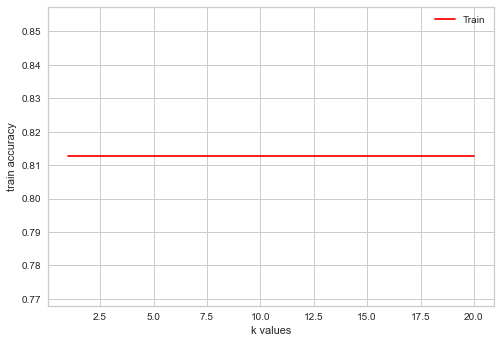

In [262]:
plt.plot(k,train_accuracy, color = 'red', label = 'Train')
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

# Top Feature list based out of SVM

In [263]:
select_top = SelectKBest(f_classif,k=5)
x_train_new = select_top.fit_transform(X_train,y_train)
x_test_new = select_top.fit_transform(X_test,y_test)

print("Top Train Features", X_train.columns.values[select_top.get_support()])
print("Top Test Features", X_test.columns.values[select_top.get_support()])
svm1.fit(X_train,y_train)
train_accuracy.append(svm1.score(X_train,y_train))

Top Train Features ['Mar_No' 'Mar_Yes' 'Cre_0.0' 'Cre_1.0' 'Loan_240.0']
Top Test Features ['Mar_No' 'Mar_Yes' 'Cre_0.0' 'Cre_1.0' 'Loan_240.0']


C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [11 12 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


# Parameter tunning for SVM

In [264]:
c= [1.0, 0.25, 0.5, 0.75]

In [265]:
kernels = ['linear', 'rbf']

In [266]:
gammas = ["auto", 0.01, 0.001, 1]

In [267]:
from sklearn.model_selection import GridSearchCV
grid_svm = GridSearchCV(estimator = svm1, param_grid = dict(kernel = kernels, C = c, gamma = gammas), cv = 5)

In [268]:
grid_svm.fit(X_train, y_train)
print("the best hyperparameter :", grid_svm.best_estimator_)

the best hyperparameter : SVC(C=0.5, gamma='auto')


In [269]:
svc_model = SVC(gamma = "auto", kernel = 'linear')

In [270]:
svc_model.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [271]:
print('train accuracy :', svc_model.score(X_train, y_train))
print('test accuracy :', svc_model.score(X_test, y_test))

train accuracy : 0.8044806517311609
test accuracy : 0.8455284552845529


In [272]:
from yellowbrick.classifier import confusion_matrix

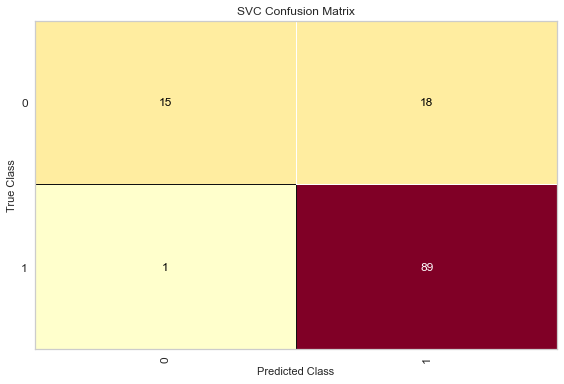

ConfusionMatrix(ax=<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002A6891C7BE0>,
                estimator=SVC(gamma='auto', kernel='linear'))

In [273]:
confusion_matrix(svc_model,X_train,y_train,X_test, y_test)

In [274]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [275]:
y_test
y_test.replace({0: "N", 1: "Y"})
y_test

587    1
473    1
199    0
13     0
18     0
      ..
332    1
439    1
364    1
357    0
144    1
Name: Loan_Status, Length: 123, dtype: int64

In [276]:
X_train

,Gen_Female,Gen_Male,Mar_No,Mar_Yes,Edu_Graduate,Edu_Not Graduate,Emp_No,Emp_Yes,Cre_0.0,Cre_1.0,...,Area_Rural,Area_Semiurban,Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Dep_0,Dep_1,Dep_2,Dep_3
276,0,1,0,1,1,0,1,0,0,1,...,0,1,0,0.061868,0.907825,1.224806,1,0,0,0
178,0,1,0,1,1,0,1,0,0,1,...,0,1,0,-0.021422,-0.517358,-0.186047,0,1,0,0
187,0,1,0,1,1,0,1,0,0,1,...,1,0,0,-0.489974,0.413320,-1.085271,1,0,0,0
354,1,0,0,1,1,0,1,0,0,1,...,0,1,0,-0.476264,-0.297530,0.031008,1,0,0,0
231,0,1,0,1,1,0,1,0,0,1,...,1,0,0,-0.033076,-0.517358,-1.333333,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,1,0,1,1,0,1,0,0,1,...,1,0,0,-0.198972,0.331483,-0.310078,1,0,0,0
333,0,1,0,1,1,0,1,0,0,1,...,0,0,1,20.402571,-0.517358,5.612403,1,0,0,0
308,0,1,1,0,1,0,1,0,0,1,...,1,0,0,5.628278,-0.517358,5.457364,1,0,0,0
127,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0.017995,0.196539,0.000000,1,0,0,0


In [277]:
y_train

276    1
178    1
187    1
354    1
231    1
      ..
608    1
333    1
308    0
127    1
69     0
Name: Loan_Status, Length: 491, dtype: int64

In [278]:
X_test

,Gen_Female,Gen_Male,Mar_No,Mar_Yes,Edu_Graduate,Edu_Not Graduate,Emp_No,Emp_Yes,Cre_0.0,Cre_1.0,...,Area_Rural,Area_Semiurban,Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Dep_0,Dep_1,Dep_2,Dep_3
587,1,0,1,0,0,1,1,0,0,1,...,0,1,0,-0.564696,-0.517358,-0.899225,1,0,0,0
473,1,0,1,0,1,0,0,1,0,1,...,0,0,1,-0.449871,-0.517358,-0.542636,1,0,0,0
199,0,1,1,0,1,0,0,1,0,1,...,0,0,1,2.463582,-0.517358,-0.697674,1,0,0,0
13,0,1,1,0,1,0,1,0,0,1,...,1,0,0,-0.671637,0.718903,-0.217054,1,0,0,0
18,0,1,0,1,0,1,1,0,0,1,...,1,0,0,0.368295,-0.517358,0.077519,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0,1,1,0,1,0,1,0,0,1,...,0,0,1,-0.335733,-0.517358,-0.883721,1,0,0,0
439,1,0,0,1,0,1,0,1,0,1,...,1,0,0,1.141217,-0.517358,0.155039,1,0,0,0
364,0,1,1,0,1,0,0,1,0,1,...,1,0,0,1.031534,-0.517358,0.201550,1,0,0,0
357,0,1,0,1,1,0,1,0,0,1,...,0,0,1,0.021422,-0.517358,-0.945736,0,1,0,0


In [279]:
y_test

587    1
473    1
199    0
13     0
18     0
      ..
332    1
439    1
364    1
357    0
144    1
Name: Loan_Status, Length: 123, dtype: int64

# Running with the required model 1. LR 2. KNN 3. DC 4. SVM

In [280]:
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)

LogisticRegression()

In [291]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))
print("LR Jaccard-score: %2.2f" % jaccard_score(y_test,LR_yhat))

LR F1-score: 0.83
LR LogLoss: 0.42
LR Jaccard-score: 0.82


In [290]:
svm1.fit(X_train,y_train)
SVM_yhat = svm1.predict(X_test)
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )
print("SVM Jaccard-score: %2.2f" % jaccard_score(y_test,SVM_yhat))

SVM F1-score: 0.81
SVM Jaccard-score: 0.82


In [342]:
dc.fit(X_train,y_train)
DT_yhat = dc.predict(X_test)
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted'))
print("DT Jaccard-Score: %2.2f" % jaccard_score(y_test,DT_yhat))

DT F1-score: 0.75
DT Jaccard-Score: 0.70


In [337]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1)

In [339]:
knn_yhat = KNN.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.74
KNN F1-score: 0.73


In [ ]:
SVM F1-score: 0.81
SVM Jaccard-score: 0.82

In [354]:
results = pd.DataFrame(a, columns= ["Jaccard", "f1-score", 'logloss'])

In [351]:
results.index.name = 'Algorithms'

In [355]:
results

,Jaccard,f1-score,logloss
0,0.83,0.82,0.42
1,0.81,0.82,NaN
2,0.75,0.70,NaN
3,0.74,0.73,NaN


In [353]:
a = [[0.83, 0.82, 0.42], [0.81, 0.82], [0.75, 0.70], [0.74, 0.73]]

In [356]:
b = ["Logistic Reg", "SVM", "DC", "KNN"]

In [357]:
results

,Jaccard,f1-score,logloss
0,0.83,0.82,0.42
1,0.81,0.82,NaN
2,0.75,0.70,NaN
3,0.74,0.73,NaN


In [359]:
results["Algorithms"] = b

In [360]:
results

,Jaccard,f1-score,logloss,Algorithms
0,0.83,0.82,0.42,Logistic Reg
1,0.81,0.82,NaN,SVM
2,0.75,0.70,NaN,DC
3,0.74,0.73,NaN,KNN


In [362]:
result=results.reindex(columns= ['Algorithms', 'Jaccard', 'f1-score','logloss'])

In [363]:
result

,Algorithms,Jaccard,f1-score,logloss
0,Logistic Reg,0.83,0.82,0.42
1,SVM,0.81,0.82,NaN
2,DC,0.75,0.70,NaN
3,KNN,0.74,0.73,NaN
